In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [30]:
matches.info()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [32]:
display(matches.head())

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [34]:
display(deliveries.head())

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [36]:
matches.columns = matches.columns.str.strip().str.replace(" ","_").str.lower()
deliveries.columns = deliveries.columns.str.strip().str.replace(" ","_").str.lower()

need_matches_cols = [
    "id","season","city","date","team1","team2","toss_winner","toss_decision","winner","win_by_runs","win_by_wickets","player_of_match","venue"
]
need_deliveries_cols = [
     "match_id","inning","batting_team","bowling_team","over","ball","batsman",
    "non_striker","bowler","is_super_over","wide_runs","bye_runs","legbye_runs",
    "noball_runs","penalty_runs","batsman_runs","extra_runs","total_runs",
    "player_dismissed","dismissal_kind","fielder"
]
print("\nMissing in matches:",[c for c in need_matches_cols if c not in matches.columns])
print("\nMissing in deliveries:",[c for c in need_deliveries_cols if c not in deliveries.columns])


Missing in matches: ['win_by_runs', 'win_by_wickets']

Missing in deliveries: ['batsman', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']


In [50]:
num_cols_deliveries = ["over","ball","batsman_runs","extra_runs","total_runs","is_super_over","wide_runs","bye_runs","legby_runs","noballs_runs","penalty_runs"]
for col in num_cols_deliveries:
    if col in deliveries.columns:
        deliveries[col] = pd.to_numeric(deliveries[col], errors='coerce')

if 'date' in matches.columns:
    try:
        matches["date"] = pd.to_datetime(matches['date'], errors='coerce')
    except Exception:
        pass

cat_cols_matches = ["city","player_of_match","winner","method"]
for col in cat_cols_matches:
    if col in matches.columns:
        matches[col] = matches[col].fillna("NA").astype(str).str.upper()

num_cols_matches = ["result_margin","target_runs","target_overs"]
for col in num_cols_matches:
    if col in matches.columns:
        matches[col] = matches[col].fillna(0)

for col in deliveries.columns:
    if deliveries[col].dtype == "object":
        deliveries[col] = deliveries[col].fillna("NA").astype(str).str.upper()
    else:
        deliveries[col] = deliveries[col].fillna(0)
print("Nulls in matches:\n",matches.isnull().sum())
print("Nulls in deliveries:\n",deliveries.isnull().sum())

Nulls in matches:
 id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64
Nulls in deliveries:
 match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [52]:
matches.to_csv("matches_clean.csv",index=False)
deliveries.to_csv("deliveries_clean.csv",index=False)

print("Cleaned dataset saves as:")
print(" - matches_clean.csv")
print(" - deliveries_clean.csv")

Cleaned dataset saves as:
 - matches_clean.csv
 - deliveries_clean.csv


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22372\329408431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")


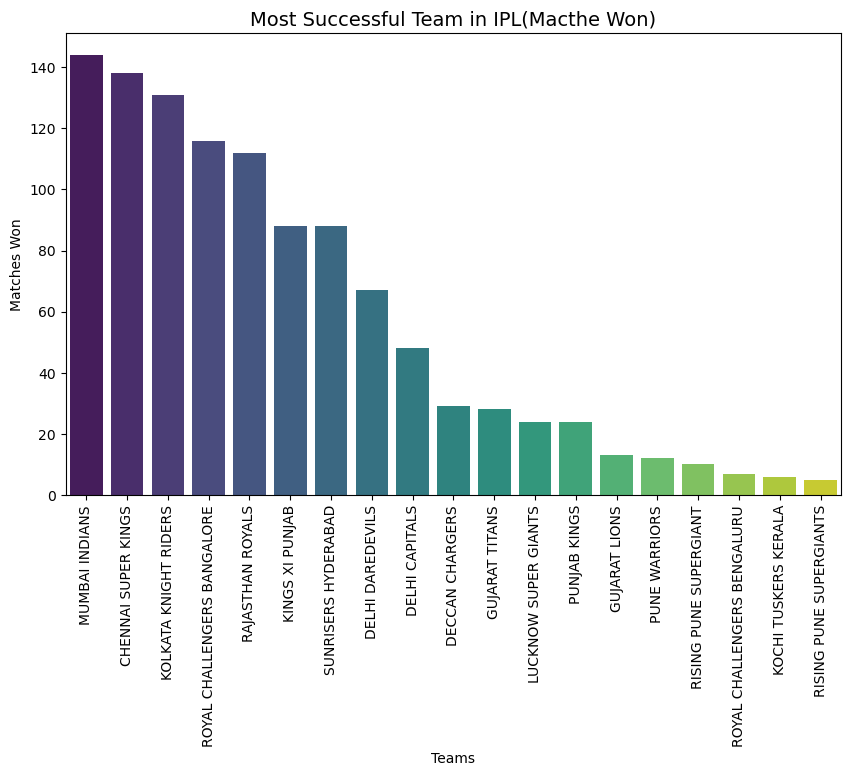

In [70]:
team_wins = matches[matches["winner"] != "NA"]["winner"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Most Successful Team in IPL(Macthe Won)", fontsize=14)
plt.ylabel("Matches Won")
plt.xlabel("Teams")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22372\1219896610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=batsman_runs.index, y=batsman_runs.values, palette="magma")


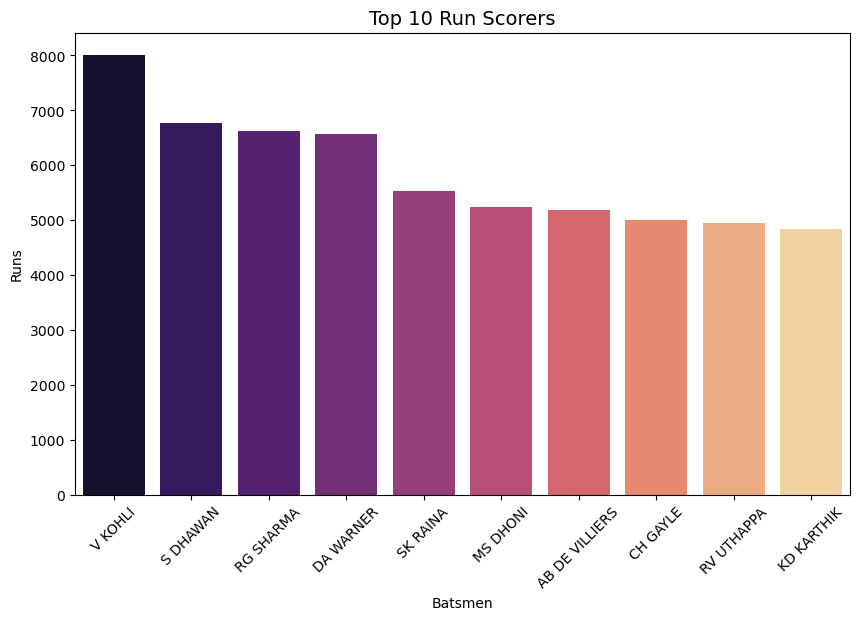

In [88]:
batsman_runs = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=batsman_runs.index, y=batsman_runs.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Run Scorers", fontsize=14)
plt.ylabel("Runs")
plt.xlabel("Batsmen")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22372\2147138991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bolwer_wicket.index, y=bolwer_wicket.values, palette="cubehelix")


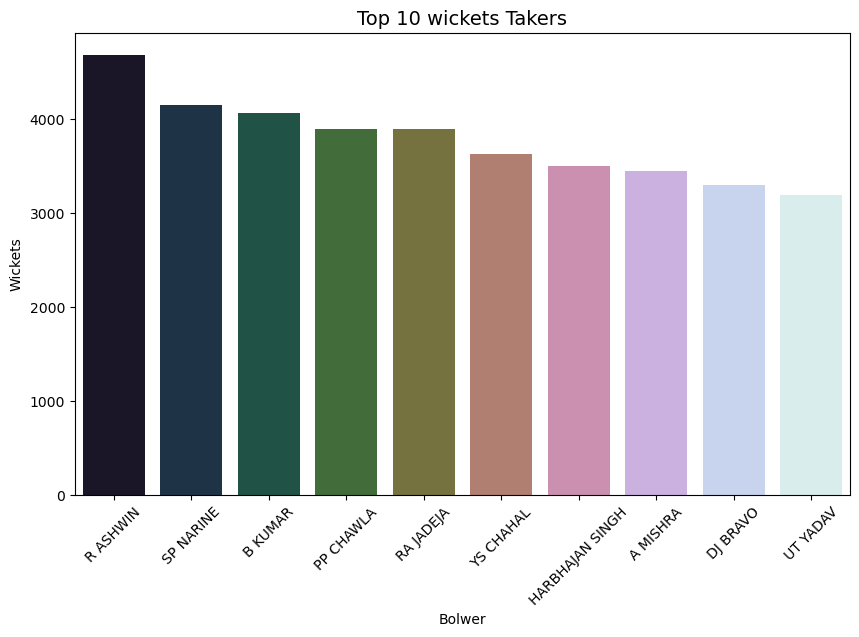

In [90]:
bolwer_wicket = deliveries[deliveries["dismissal_kind"].notna() & 
                            (deliveries["dismissal_kind"] != "run out")] \
                            .groupby("bowler")["dismissal_kind"].count() \
                            .sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=bolwer_wicket.index, y=bolwer_wicket.values, palette="cubehelix")
plt.xticks(rotation=45)
plt.title("Top 10 wickets Takers",fontsize=14)
plt.ylabel("Wickets")
plt.xlabel("Bolwer")
plt.show()

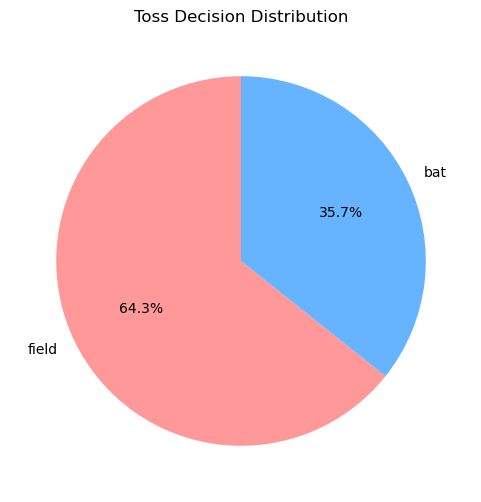

In [92]:
toss_decision = matches["toss_decision"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(toss_decision.values, labels=toss_decision.index, autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Toss Decision Distribution")
plt.show()


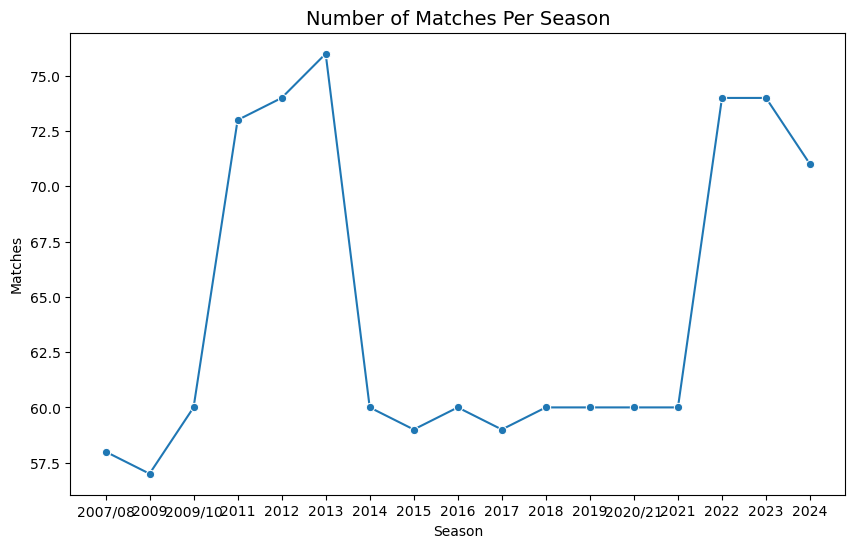

In [94]:
matches_per_season = matches["season"].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=matches_per_season.index, y=matches_per_season.values, marker="o")
plt.title("Number of Matches Per Season", fontsize=14)
plt.ylabel("Matches")
plt.xlabel("Season")
plt.show()